In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf

Importing Data


In [11]:

def get_data(stocks, start, end):
    stockData = yf.download(stocks, start=start, end=end)['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

In [12]:
stockList = ['CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']
stocks = [stock + '.AX' for stock in stockList]
endDate= dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)

In [14]:
meanReturns, covMatrix = get_data(stocks, startDate, endDate)
print("Mean Returns:\n", meanReturns)
print("\nCovariance Matrix:\n", covMatrix)

[*********************100%***********************]  6 of 6 completed

Mean Returns:
 Ticker
BHP.AX   -0.000786
CBA.AX    0.001667
NAB.AX    0.001657
STO.AX    0.000108
TLS.AX    0.000315
WBC.AX    0.002207
dtype: float64

Covariance Matrix:
 Ticker    BHP.AX    CBA.AX    NAB.AX    STO.AX    TLS.AX    WBC.AX
Ticker                                                            
BHP.AX  0.000143  0.000041  0.000032  0.000051  0.000021  0.000035
CBA.AX  0.000041  0.000124  0.000094  0.000050  0.000041  0.000100
NAB.AX  0.000032  0.000094  0.000111  0.000038  0.000030  0.000095
STO.AX  0.000051  0.000050  0.000038  0.000188  0.000037  0.000034
TLS.AX  0.000021  0.000041  0.000030  0.000037  0.000080  0.000036
WBC.AX  0.000035  0.000100  0.000095  0.000034  0.000036  0.000135


In [17]:
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)
print(weights)

[0.24129378 0.26129109 0.15383441 0.21418137 0.00031279 0.12908656]


Monte Carlo Method


In [20]:
sims = 100   #no. of simulations
T = 100   #timeframe in days
meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T

In [28]:
portfolio_sims = np.full(shape=(T, sims), fill_value=0.0)
initialPortfolio = 10000

In [29]:
for m in range(0, sims):
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1) * initialPortfolio    #taking the cumulative daily returns

Plotting


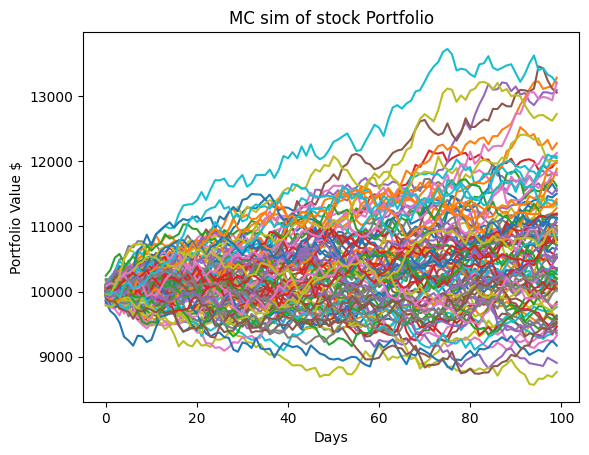

In [30]:
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value $')
plt.xlabel('Days')
plt.title('MC sim of stock Portfolio')
plt.show()
